<a href="https://colab.research.google.com/github/DanLangas/CursDL/blob/main/Laborator_01_05_11_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
print("TensorFlow Version:" + tf.__version__)

TensorFlow Version:2.15.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_test.shape

(10000,)

In [ ]:
x_test.size

7840000

In [ ]:
x_train.max()

255

In [ ]:
x_train.min()

0

In [ ]:
x_train, x_test= x_train/255.0, x_test/255.0

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
print(y_test.min(), y_test.max())

0 9


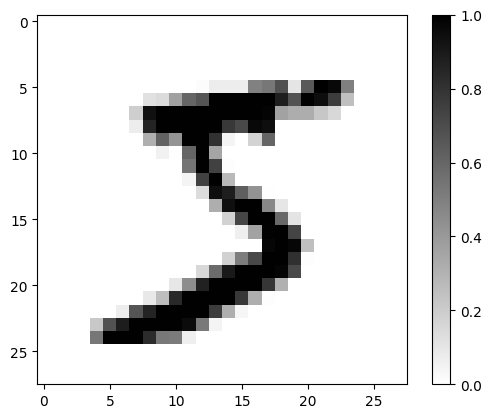

In [ ]:
plt.figure()
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

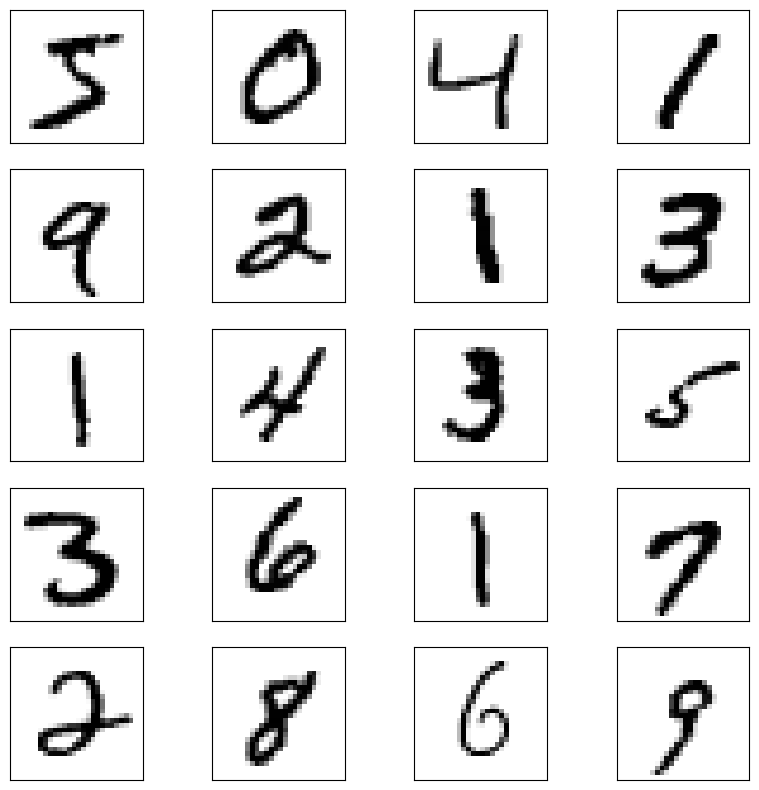

In [ ]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

Stabilirea straturilor

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    #tf.keras.layers.Dropout(0.2) #dropout pentru neuroni
    tf.keras.layers.Dense(10)
])

In [ ]:
model.summary()
# 784 = 28*28
# 100480 = 128 * 785 (atatea ponderi sunt la acest nivel)
# 1290 = 10 * 129 (atatea ponderi sunt la acest nivel)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.10857631,  0.25872713, -0.12851879, -0.03954968, -0.42301363,
        -0.49760062,  0.29380172, -0.44415963,  0.31495667, -0.8248764 ]],
      dtype=float32)

In [ ]:
tf.nn.softmax(predictions).numpy() # functia softmax din tensorflow nn ca si modul. o aplicam pe vectorul predictions

array([[0.11979451, 0.13920236, 0.09450783, 0.1033015 , 0.07039963,
        0.06533977, 0.14417146, 0.06892658, 0.14725389, 0.04710246]],
      dtype=float32)

Modelul trebuie optimizat. Se defineste functia cost.
SparseCategoricalCrossentropy:

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
loss_fn(y_train[:1], predictions).numpy()

2.7281544

Inainte de a incepe antrenarea retelei, configuram si compilam modelul folosind functia model.compile din Keras.
* optimizarea ratei de invatare
* functia cost
* metrica folosita pentru evaluarea modelului

Compilarea modelului

In [ ]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

Antrenarea modelului. Alegem nr de iteratii(epochs). ref # https://keras.io/api/models/model_training_apis/

In [ ]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2658 - accuracy: 0.9238
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1177 - accuracy: 0.9648
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0812 - accuracy: 0.9757
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0600 - accuracy: 0.9817
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0473 - accuracy: 0.9848


Evaluarea modelului.
verbose: ;auto, 0,1, 2 - vezi documentatie

In [ ]:
model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.0854 - accuracy: 0.9764


[0.08536863327026367, 0.9764000177383423]

Daca se doreste ca modelul sa returneze probabilitatea, atunci putem adauga functia softmax la sfarsit

In [ ]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

Obtinerea predictiilor

In [ ]:
predictions = probability_model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
predictions.shape

(10000, 10)

Fiecare predictie este un vector de 10 numere reale. Acestea reprezinta probabilitatea cu care imaginea corespunde unuia dintre cele 10 valori de iesire. Valoarea cu probabilitatea cea mai mare va corespunde valorii clasei estimate.

In [ ]:
predictions

array([[2.31853488e-08, 1.93725924e-09, 6.27914869e-06, ...,
        9.99981940e-01, 4.47935058e-08, 2.07684934e-06],
       [2.47491583e-09, 2.94677193e-06, 9.99993384e-01, ...,
        1.70268858e-15, 2.12924147e-06, 5.86538674e-12],
       [1.17470461e-06, 9.98362362e-01, 4.36736766e-04, ...,
        8.91406147e-04, 1.75277528e-04, 1.71621821e-06],
       ...,
       [1.06672015e-11, 5.18244159e-09, 3.22855270e-10, ...,
        2.71251047e-05, 4.58634076e-06, 1.09465233e-04],
       [4.10524770e-09, 3.87531673e-10, 2.19153948e-11, ...,
        5.09695530e-09, 7.83719599e-07, 1.44984399e-10],
       [4.94635970e-07, 2.13078222e-10, 1.75196169e-06, ...,
        2.29074203e-12, 1.16766138e-10, 4.72309032e-11]], dtype=float32)

In [ ]:
predictions[0] #predictia pentru prima imagine din multimea de testare

array([2.3185349e-08, 1.9372592e-09, 6.2791487e-06, 9.5857322e-06,
       2.4531921e-10, 2.8316295e-08, 1.1745559e-14, 9.9998194e-01,
       4.4793506e-08, 2.0768493e-06], dtype=float32)

In [ ]:
np.argmax(predictions[0]) # valoarea care este considerata ca si clasa estimata

7

In [ ]:
t = np.arange(len(y_test))
for i in range(len(y_test)):
  t[i] = math.fabs(np.argmax(predictions[i]) - y_test[i])
print(np.mean(t))
print(np.argmax(t))

0.0941
2293


In [ ]:
# verificarea predictiilor
# Definim functii care sa reprezinte grafic imaginile si predictiile corespunzatoare
# functie pentru reprezentarea imaginii
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img,cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
      color = 'red'

  plt.xlabel(" {:2.0f}% ()".format(100*np.max(predictions_array),color=color))

In [ ]:
# functie pentru reprezentarea predictiilor
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

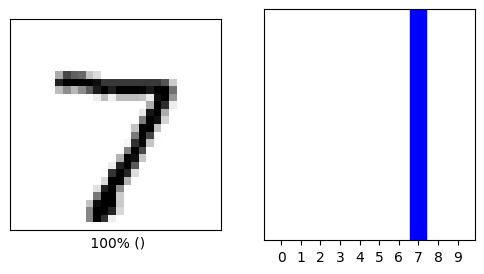

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], y_test)
plt.show()

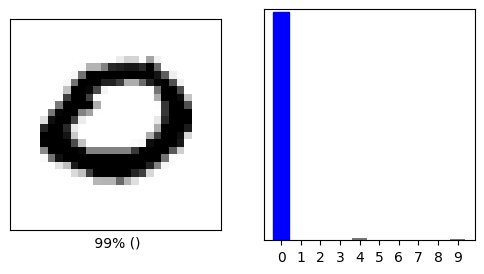

In [ ]:
i = 1987
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], y_test)
plt.show()

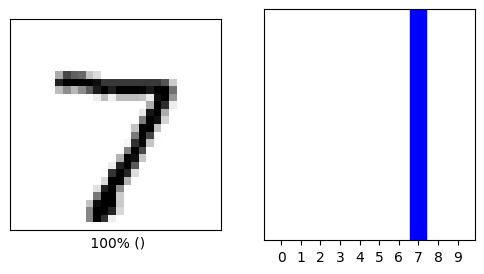

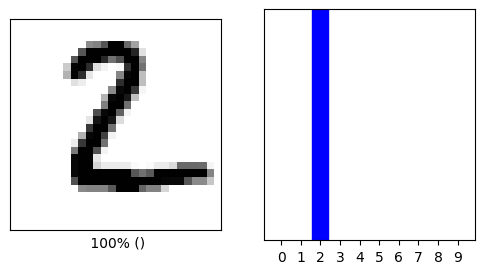

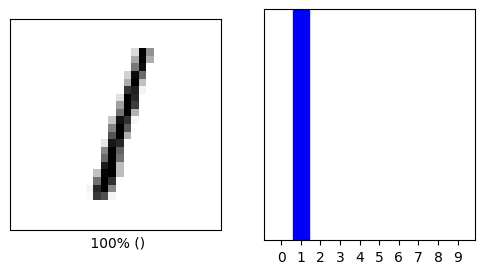

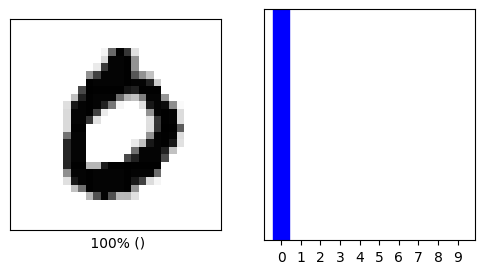

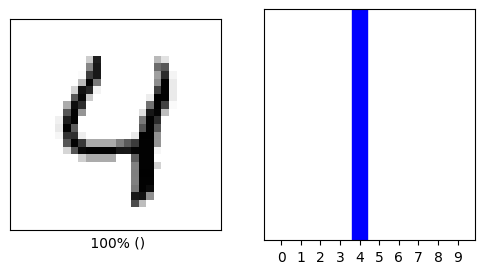

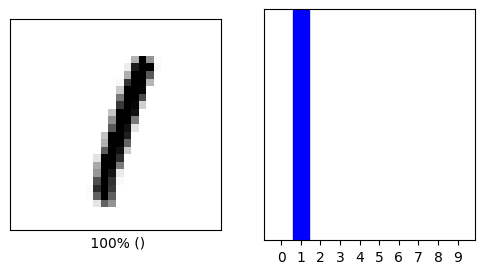

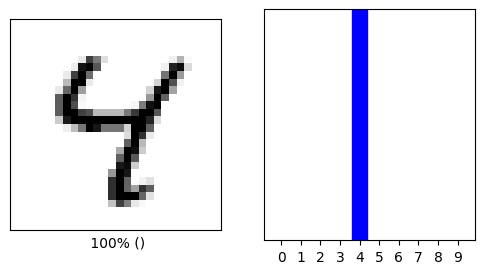

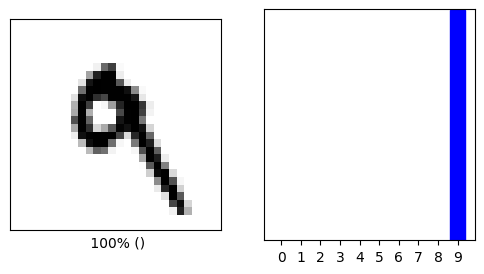

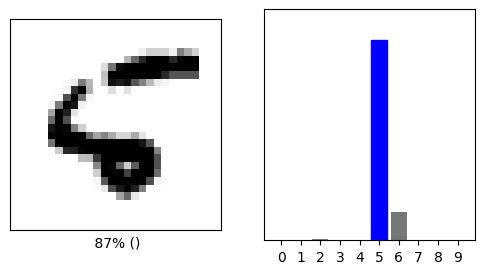

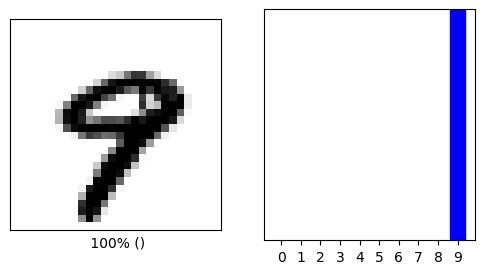

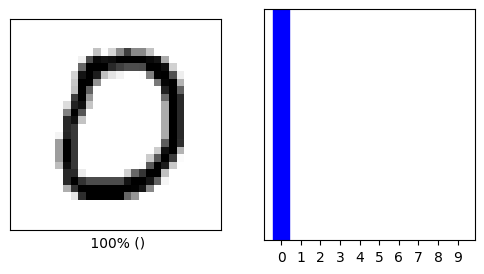

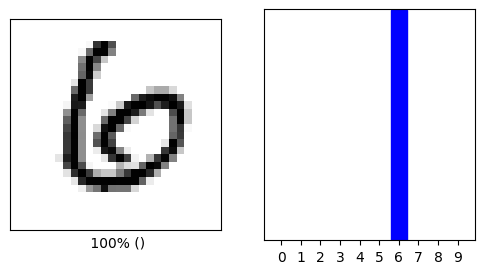

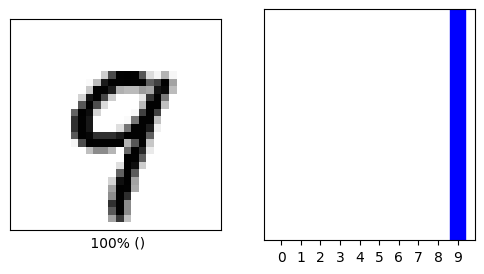

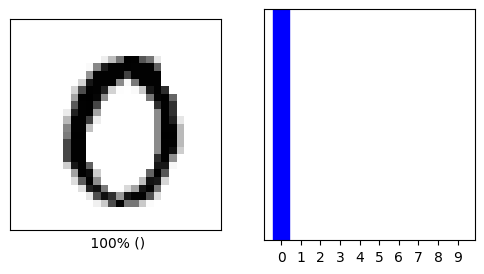

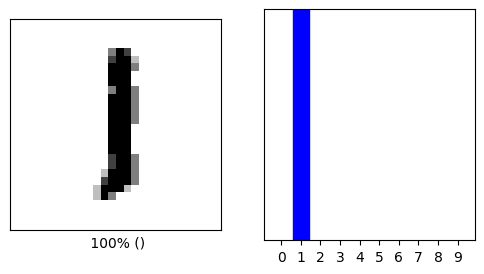

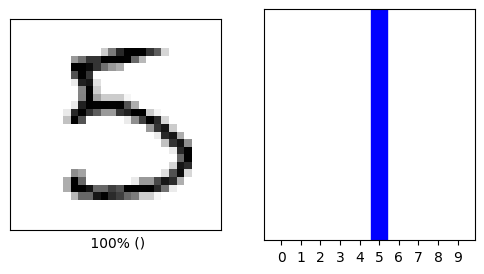

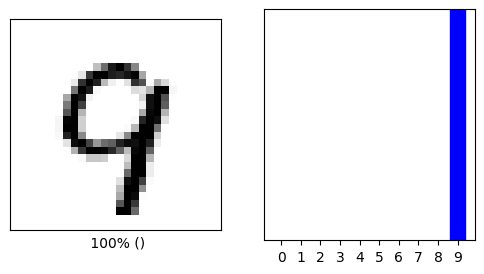

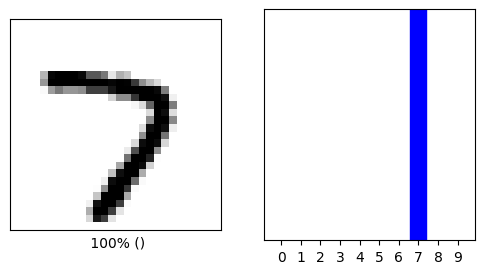

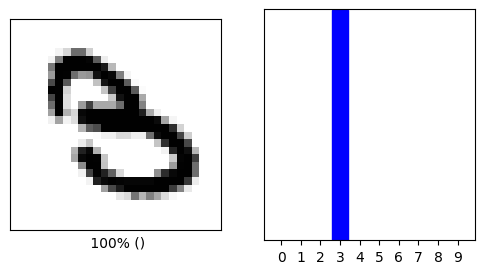

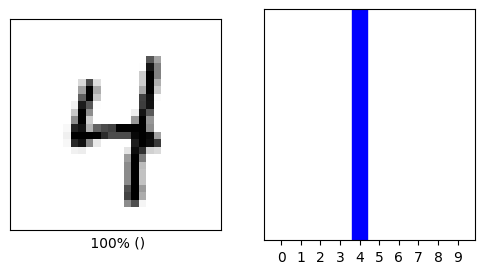

In [ ]:
j = 0
for i in range(20):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(1,2,2)
  j +=2
  plot_value_array(i, predictions[i], y_test)
  plt.show()

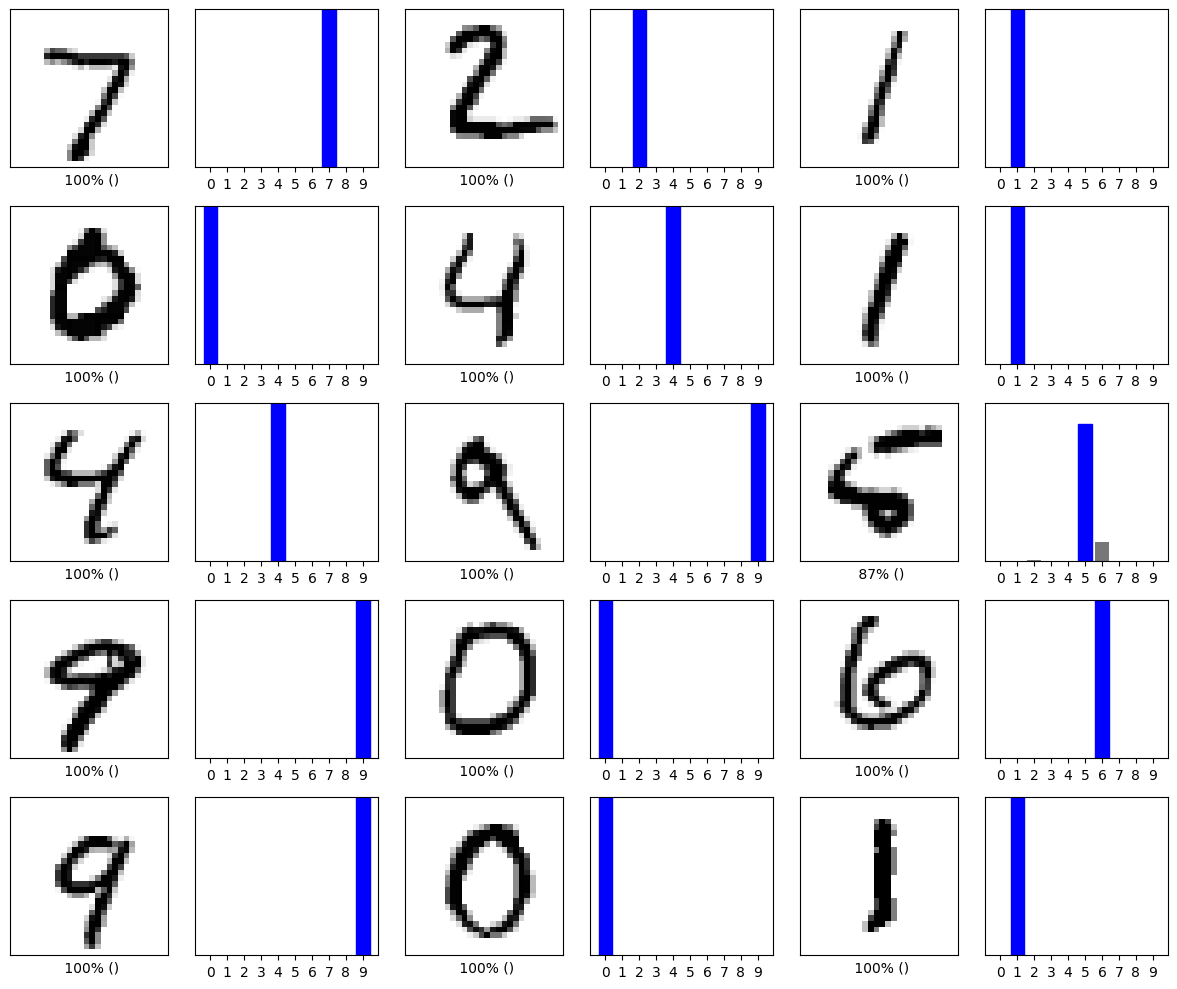

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i,predictions[i], y_test)
plt.tight_layout()
plt.show()